In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [3]:
X_train.shape

(105, 2)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron

In [7]:
ppn = Perceptron(max_iter = 5,eta0=0.1,random_state=0)
#  max_iter: aka epoch
#  tol: toleance
#  
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=5, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 3


In [9]:
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_pred,y_test))

Accuracy: 0.93


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [11]:
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot all samples
    X_test,y_test = X[test_idx, :],y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],
                    alpha = 0.8, c = cmap(idx),
                   marker=markers[idx],label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c = "",
                    alpha = 1,linewidth=1,marker = "o",
                    s=90,edgecolors = "k",label='test set')


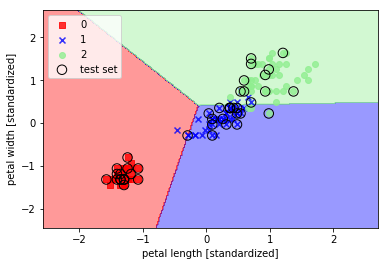

In [12]:
%matplotlib inline
# plt.figure(figsize=(10,8))
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X = X_combined_std,
                      y = y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

In [13]:
plt.scatter?

 # 逻辑回归
   

In [14]:
from sklearn.linear_model import LogisticRegression

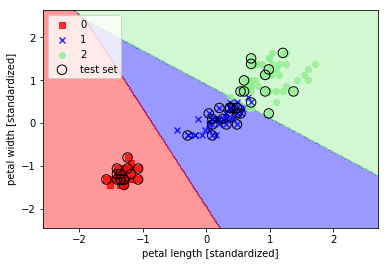

In [15]:
lr = LogisticRegression(C=1000,random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [16]:
# lr.predict_proba(X_test_std[:1])
lr.predict(X_test_std)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

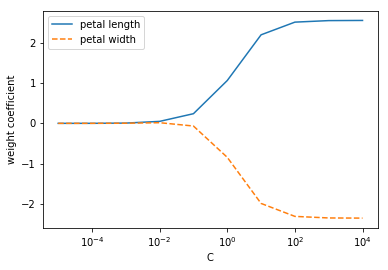

In [17]:
weights, params = [],[]
for c in range(-5,5):
    lr = LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params,weights[:,0],
         label='petal length')
plt.plot(params,weights[:,1],linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc="upper left")
plt.xscale('log')
plt.show()

In [18]:
# for each in np.arange(-1,5):
#     print(each,type(each),type(10))
#     print(10**each)

# Raise each base in x1 to the positionally-corresponding power in x2. 
# x1 and x2 must be broadcastable to the same shape.
# Note that an integer type raised to a negative integer power will raise a ValueError.


# 支持向量机

In [19]:
from sklearn.svm import SVC

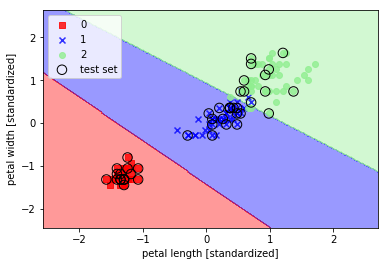

In [20]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier = svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

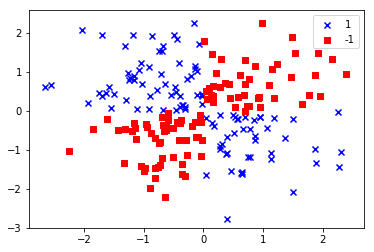

In [21]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],
            c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],
            c='r',marker='s',label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

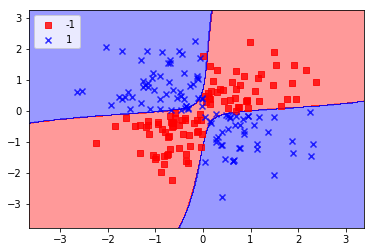

In [22]:
svm = SVC(kernel='rbf',random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc="upper left")
plt.show()

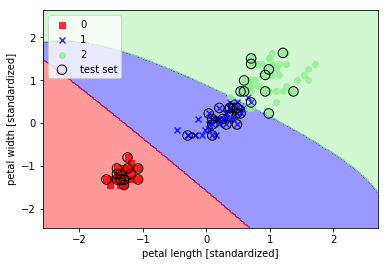

In [23]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

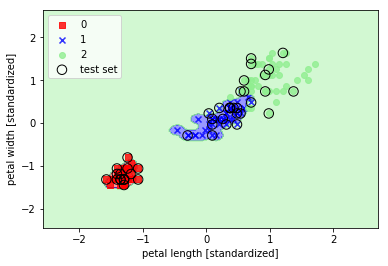

In [24]:
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

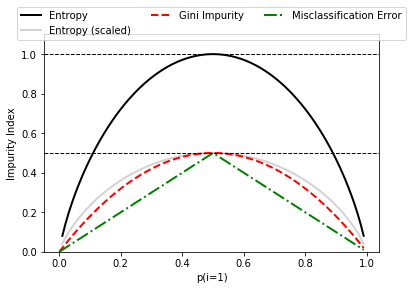

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1-p) + (1-p)*(1-(1-p))
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))
def error(p):
    return 1 - np.max([p,1-p])

x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p!= 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 
                           'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3,shadow=False)
ax.axhline(y=0.5, linewidth=1,color='k',linestyle='--')
ax.axhline(y=1, linewidth=1,color='k',linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier

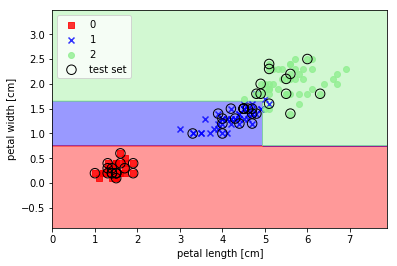

In [27]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc="upper left")
plt.show()

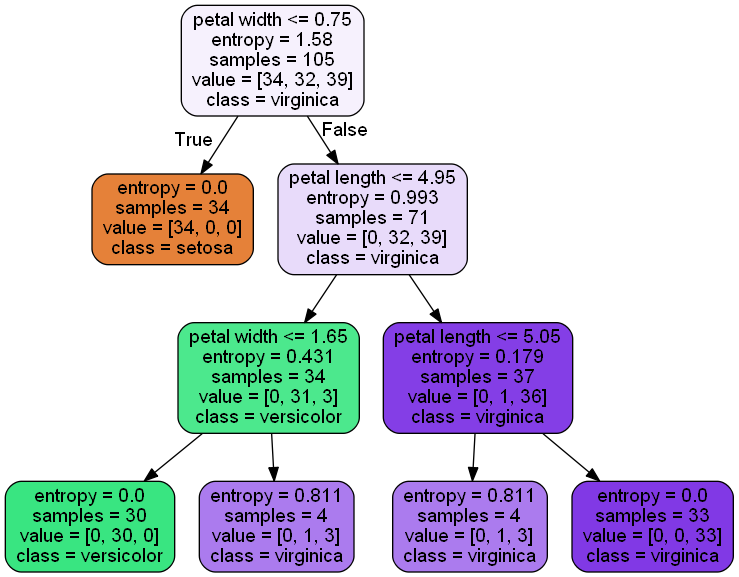

In [33]:
#  install graphviz download from http://www.graphviz.org/download/
# setup environment variable
#  conda install pydotplus
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image,display

dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=['petal length', 'petal width'],  
    class_names=['setosa', 'versicolor', 'virginica'],  
    filled=True,
    rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

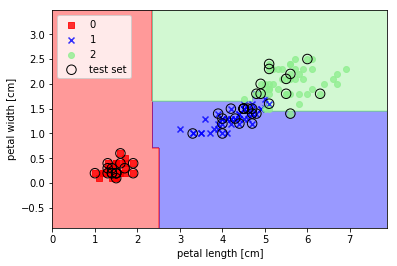

0.98

In [40]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, 
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc="upper left")
plt.show()
forest.score(X_combined,y_combined)

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

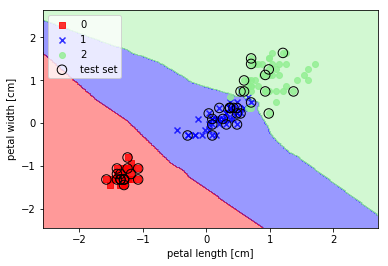

In [42]:
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, 
                      test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc="upper left")
plt.show()

In [29]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["type"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df_1 = iris_df.groupby("type").mean().reset_index()
df_1.head()

,type,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.006,3.418,1.464,0.244
1,1,5.936,2.770,4.260,1.326
2,2,6.588,2.974,5.552,2.026


In [31]:
df_2 = iris_df.groupby("type").count().reset_index()
df_2.head()

,type,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,50,50,50,50
1,1,50,50,50,50
2,2,50,50,50,50


In [32]:
result_df = pd.merge(df_1,df_2,left_on="type",right_on="type",suffixes=["_mean","_count"])
result_df.head()

,type,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean,sepal length (cm)_count,sepal width (cm)_count,petal length (cm)_count,petal width (cm)_count
0,0,5.006,3.418,1.464,0.244,50,50,50,50
1,1,5.936,2.770,4.260,1.326,50,50,50,50
2,2,6.588,2.974,5.552,2.026,50,50,50,50


In [51]:
s = pd.Series([1, 2, 3])
s[[1,2,3]]


1    2.0
2    3.0
3    NaN
dtype: float64

In [50]:
s.loc[[1,2,3]]

1    2.0
2    3.0
3    NaN
dtype: float64